In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
x = df.drop(['Strength'],axis=1)
y = df[['Strength']]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape

((721, 8), (309, 8))

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [14]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

y_pred = lr.predict(x_test)

print('R2 score of model without applying any transformation : ',r2_score(y_test,y_pred))
print("Cross val score if model without appliying any transformation : ",cross_val_score(lr,x_test,y_test,scoring='r2').mean())


R2 score of model without applying any transformation :  0.6441742854285606
Cross val score if model without appliying any transformation :  0.626854501333872


### plotting plots for all features

/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/janardhan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

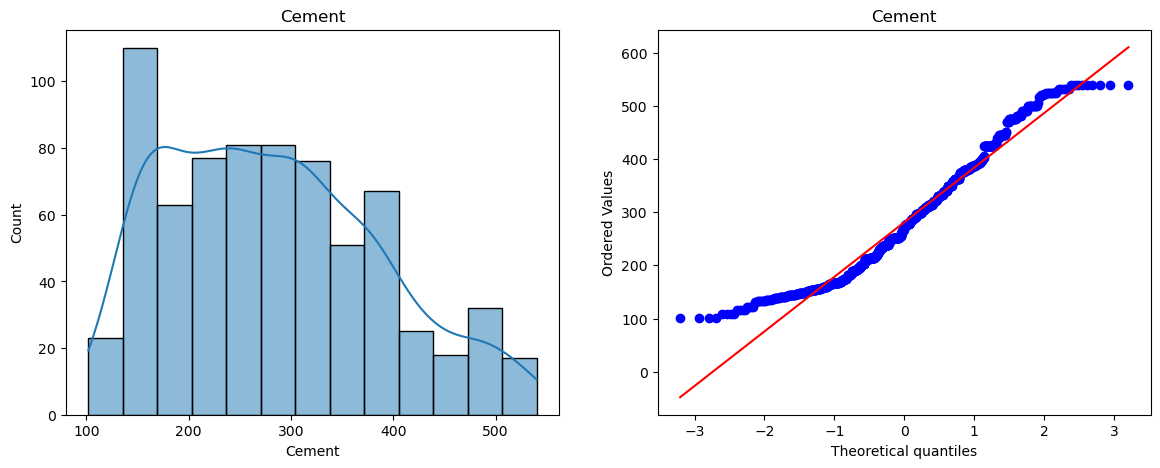

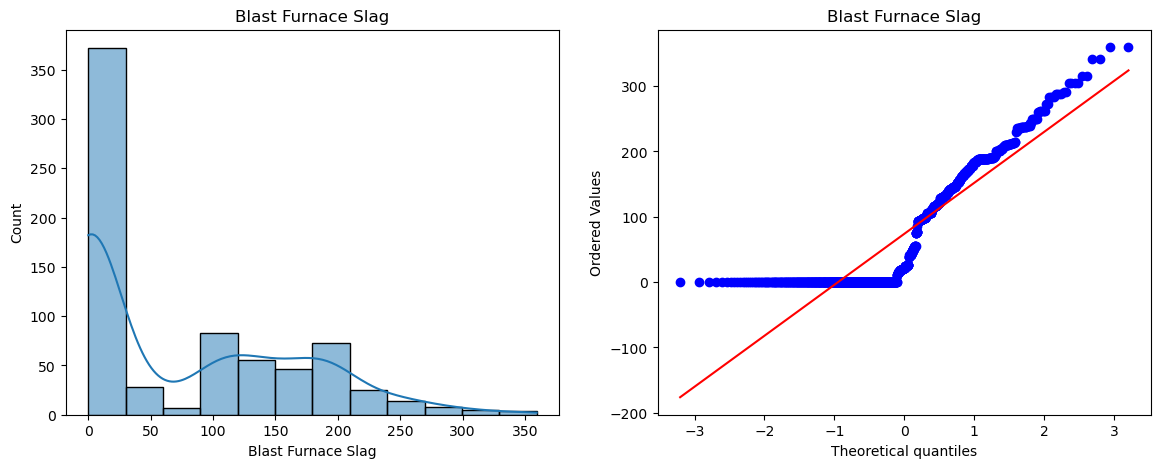

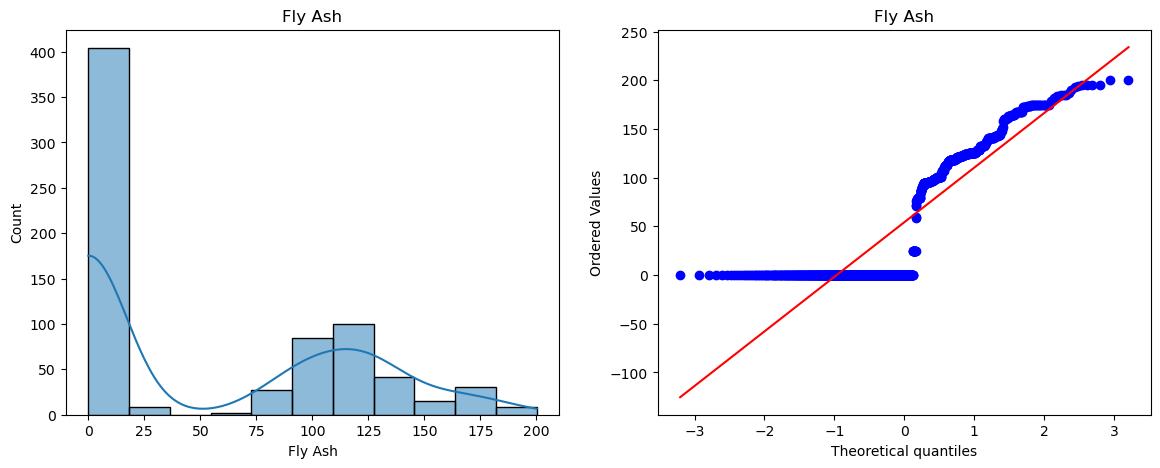

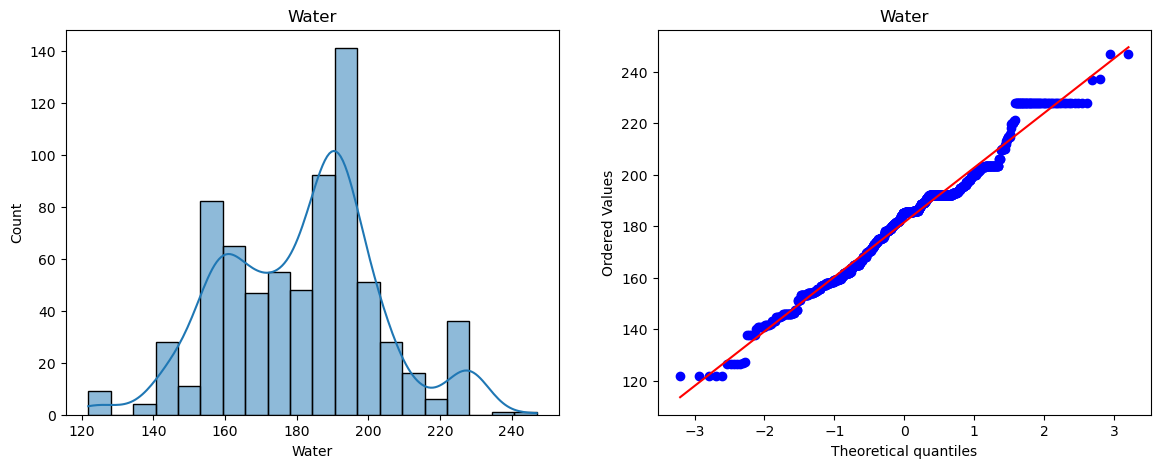

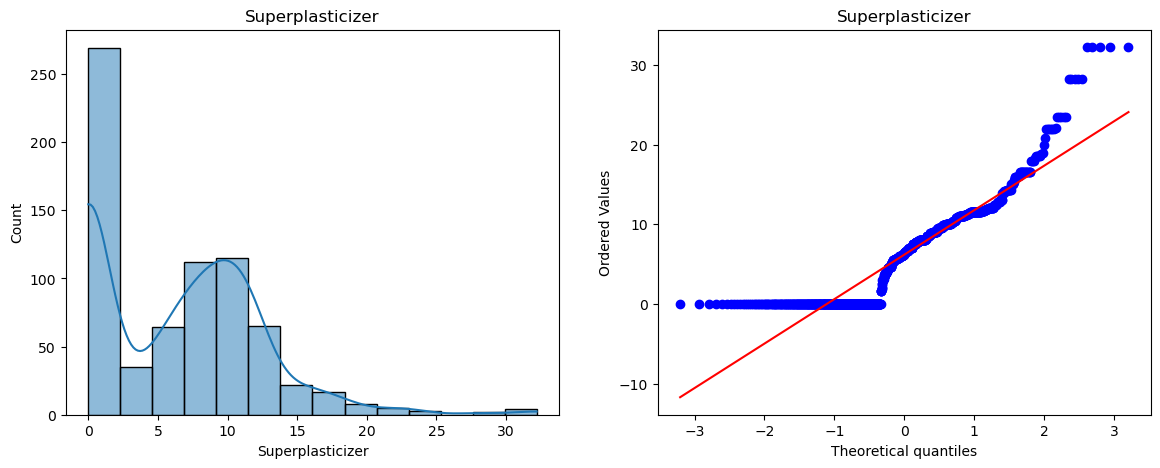

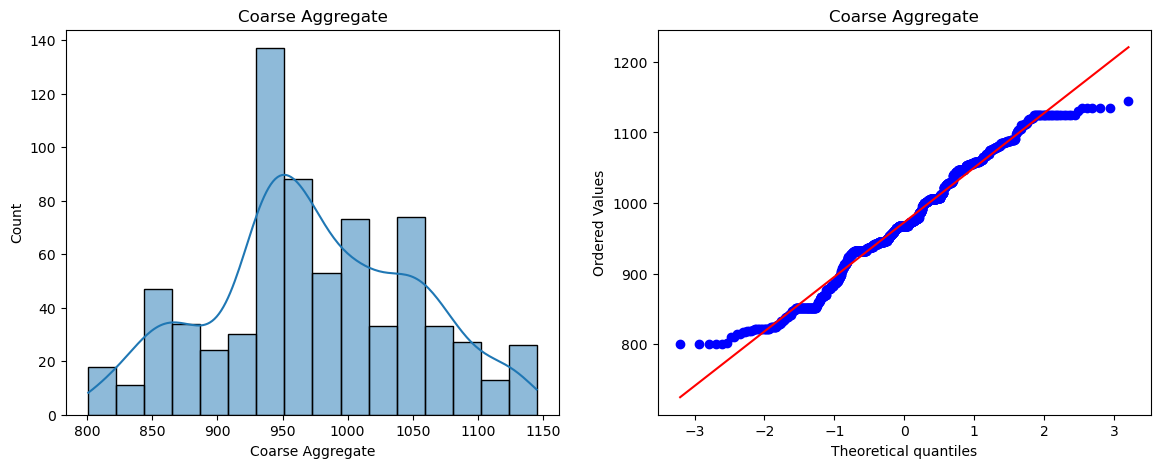

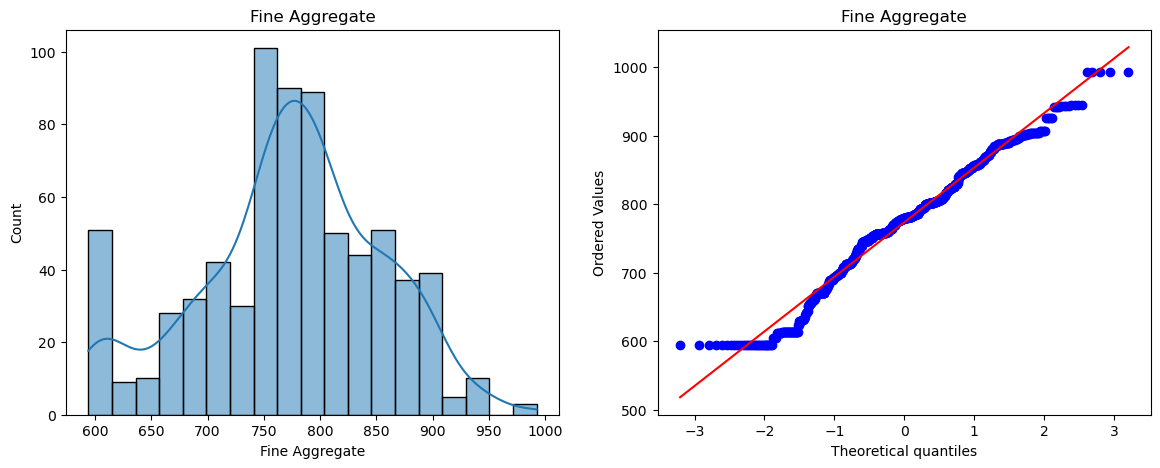

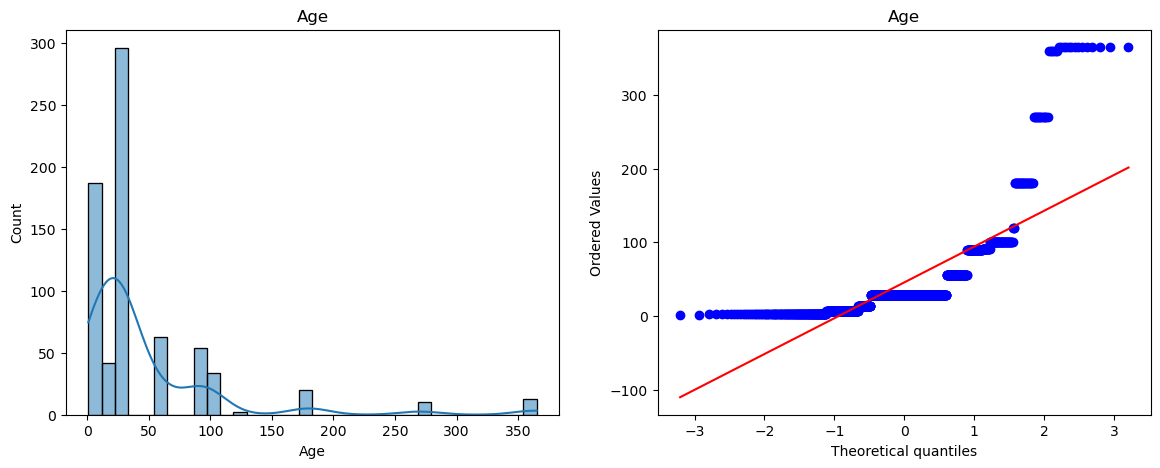

In [18]:
import scipy.stats as stats

for col in x_train.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    sns.histplot(x_train[col],kde=True)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title(col)
# * cement -> light right skewed
# * blast furnace slag -> right skewed
# * fly ash -> right skewed
# * water -> normal
# * SuperPlasticizer -> right skewed
# * Coarse Aggregate , Fine Aggregate -> normal
# * Age -> right skewed

In [20]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
x_train_transformed = pt.fit_transform(x_train+0.00001)
x_test_transformed = pt.transform(x_test+0.00001)

In [22]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [26]:
y_pred=lr.predict(x_test_transformed)
print("R2 score after box-cox transfromation : ",r2_score(y_test,y_pred))
print("cross val score after applying box cox transformation : ",cross_val_score(lr,x_test_transformed,y_test,scoring='r2').mean())

R2 score after box-cox transfromation :  0.8146848123691102
cross val score after applying box cox transformation :  0.7990341750502965


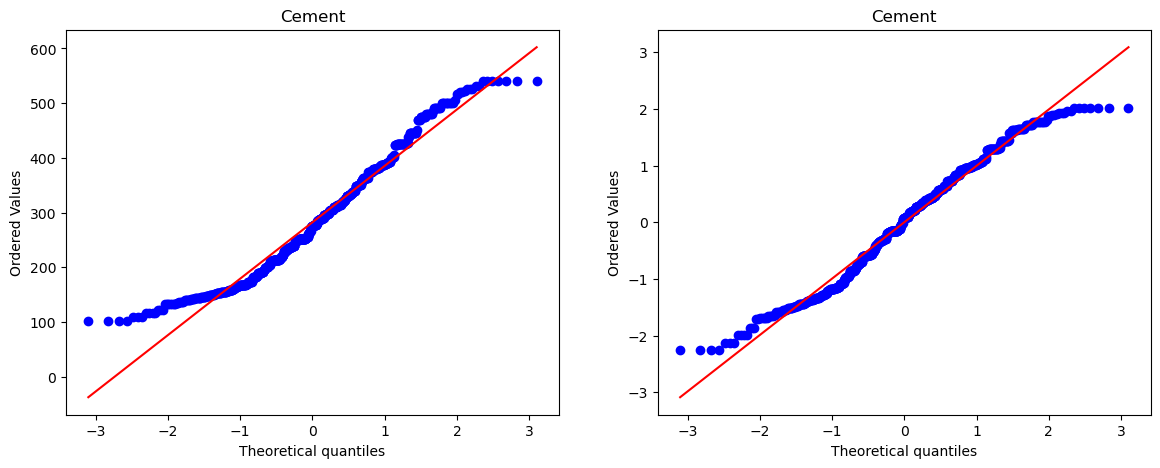

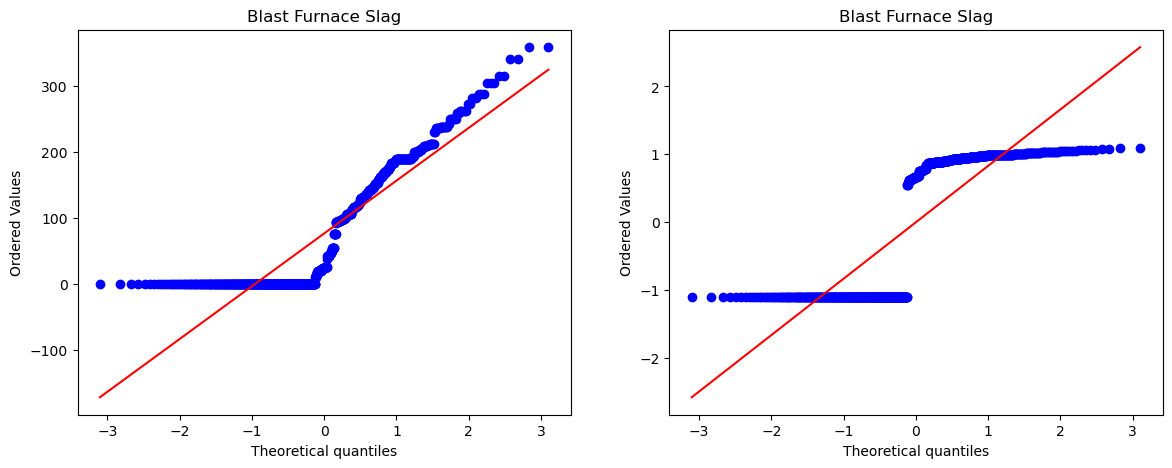

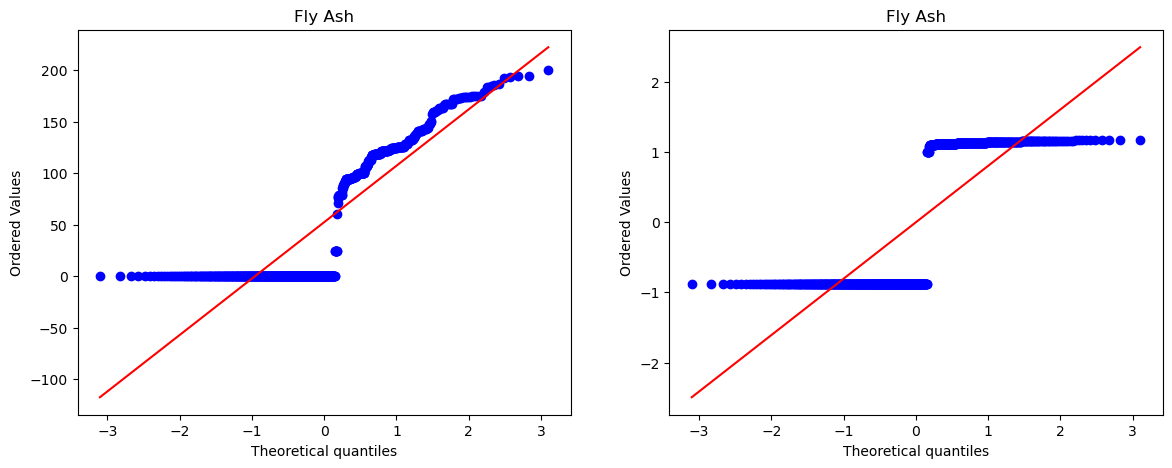

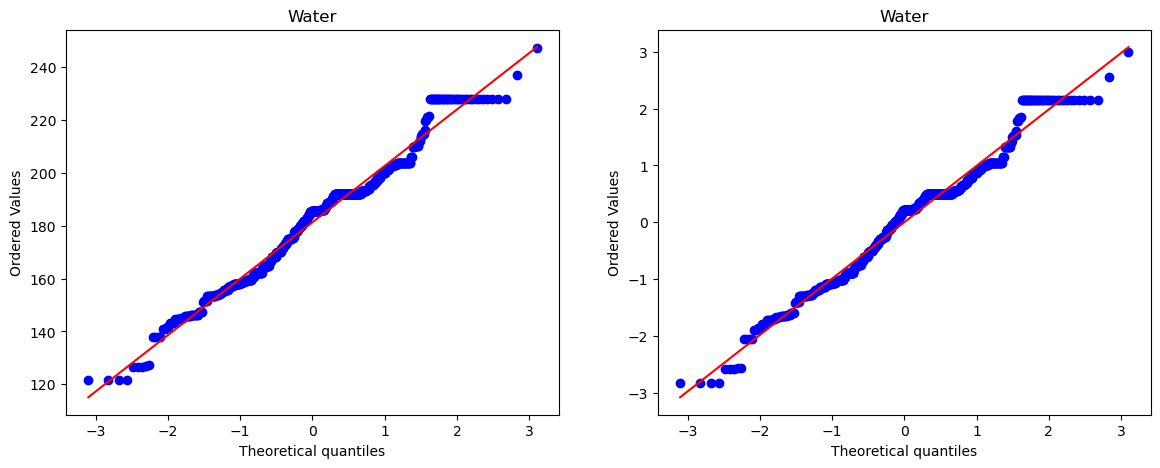

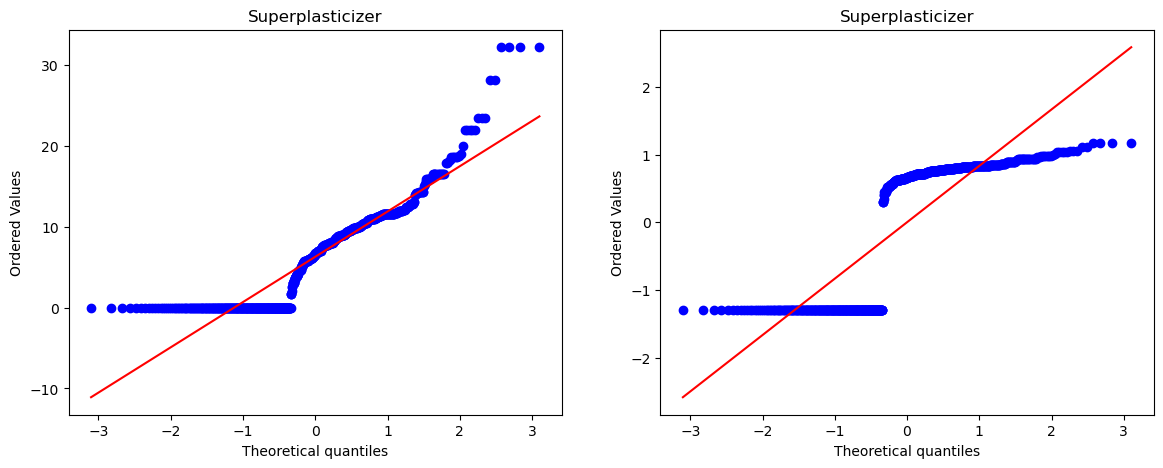

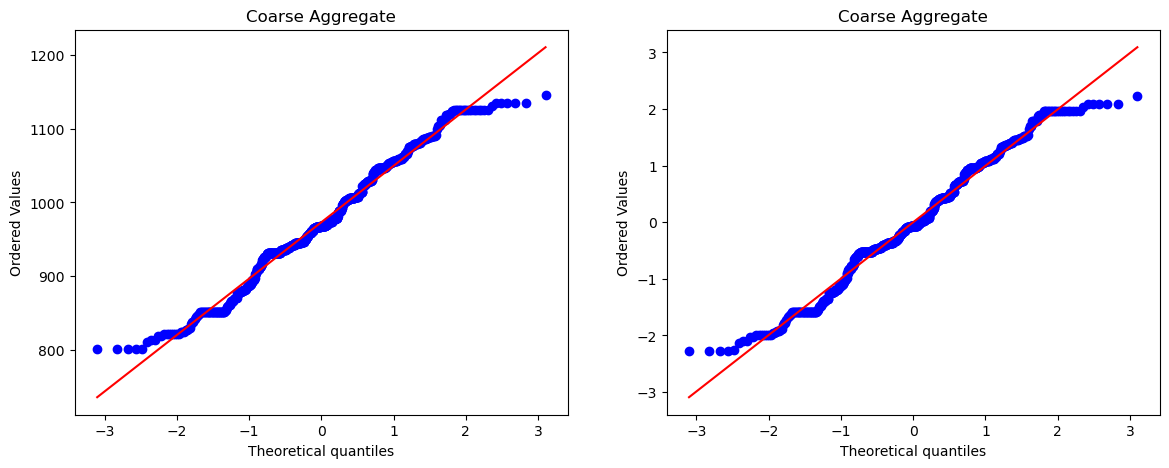

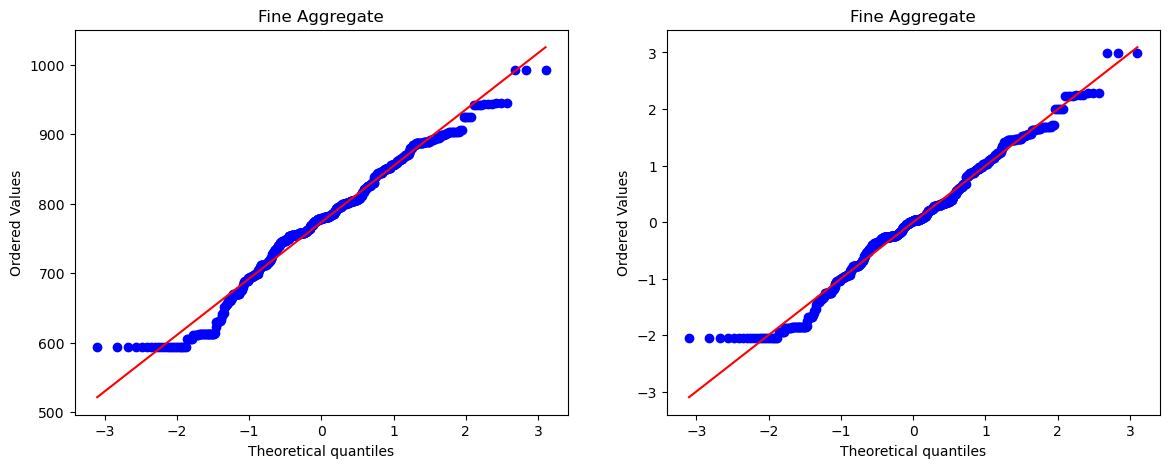

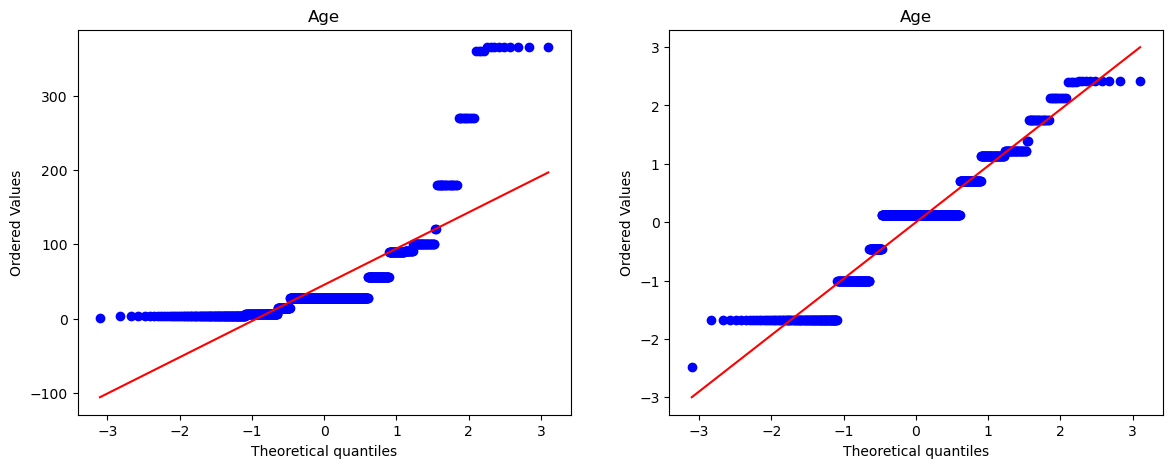

In [30]:
# poting all qq plots
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)
for col in x_train.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train_transformed[col],dist='norm',plot=plt)
    plt.title(col)
    
# Blast furnace slag become worse
# fly ash become worse
# superplasticizer become worse

In [31]:
pt.lambdas_

array([ 0.24155313,  0.03275083, -0.04516324,  0.87263698,  0.11536917,
        0.87482975,  1.87010896,  0.04703333])

### yeo johnson transformation

In [33]:
pt = PowerTransformer(method='yeo-johnson')
x_train_transformed = pt.fit_transform(x_train+0.00001)
x_test_transformed = pt.transform(x_test+0.00001)

In [34]:
lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [36]:
y_pred=lr.predict(x_test_transformed)
print("R2 score after yeo-johnson transfromation : ",r2_score(y_test,y_pred))
print("cross val score after applying yeo-johnson transformation : ",cross_val_score(lr,x_test_transformed,y_test,scoring='r2').mean())

R2 score after yeo-johnson transfromation :  0.819371054441225
cross val score after applying yeo-johnson transformation :  0.8055893221600485


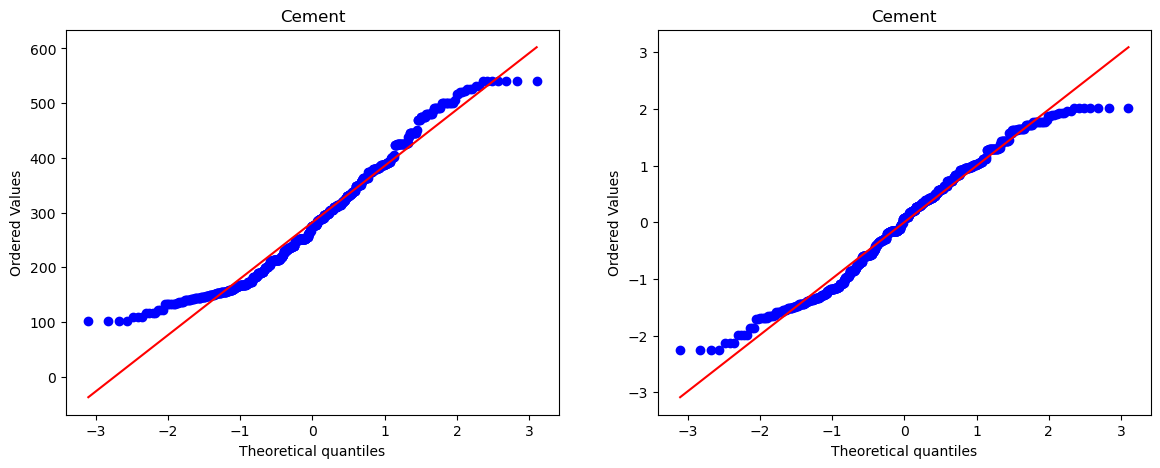

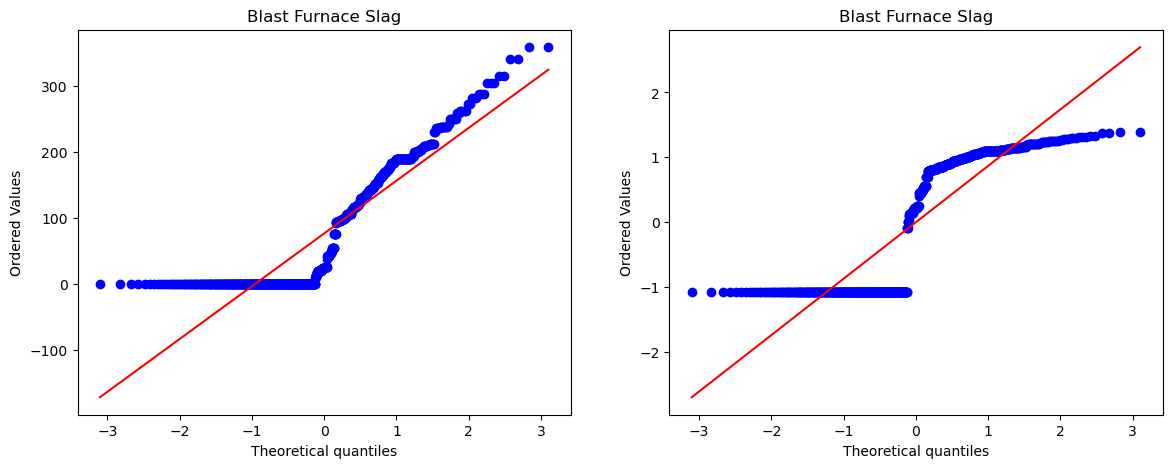

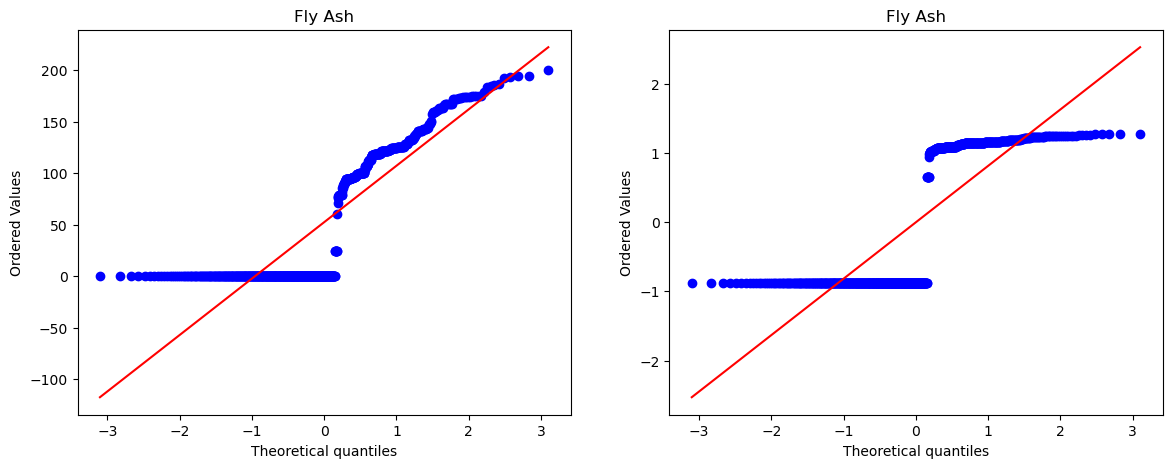

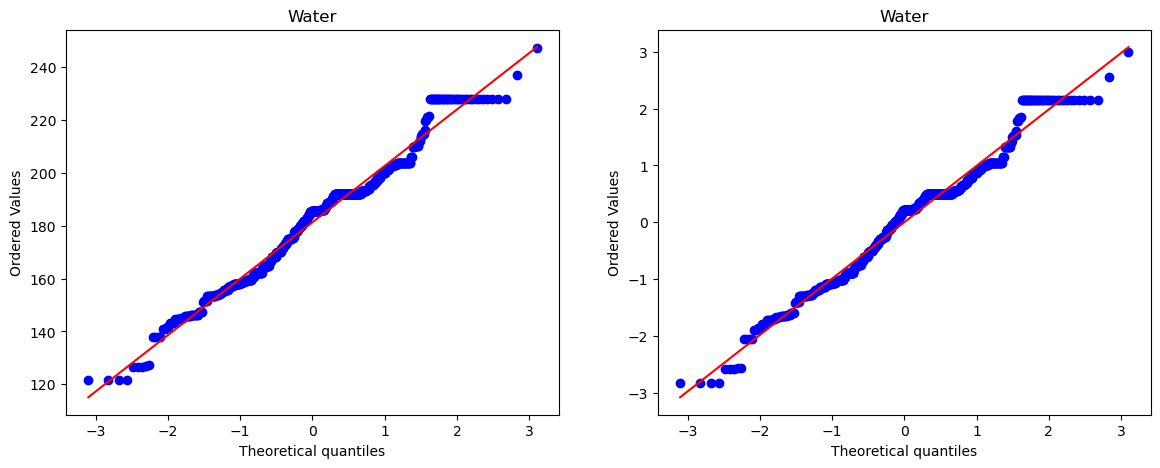

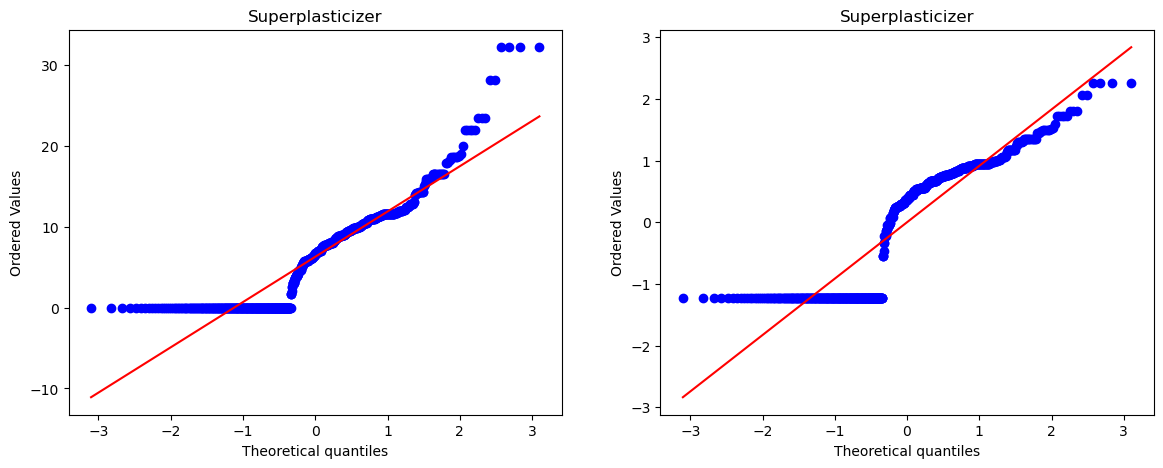

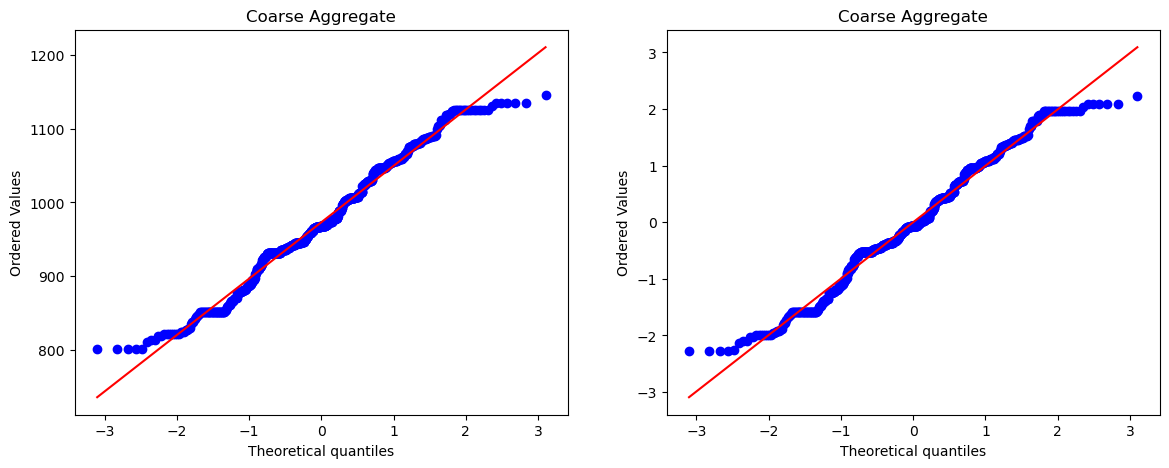

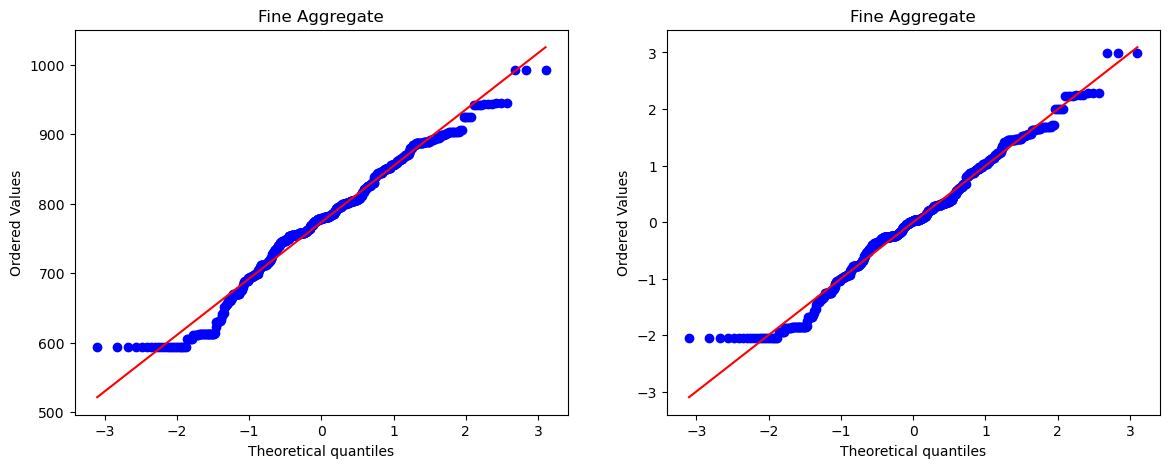

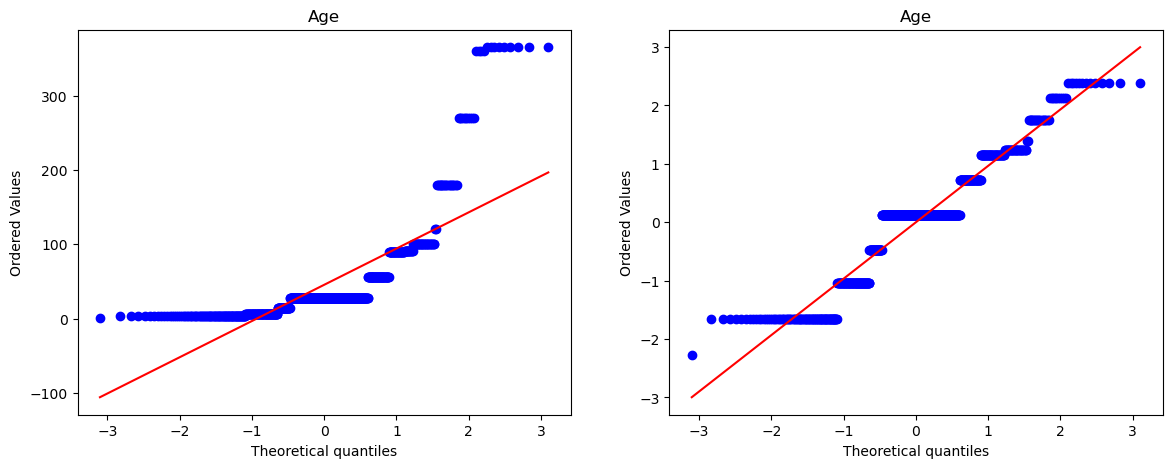

In [37]:
# poting all qq plots
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)
for col in x_train.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    stats.probplot(x_train[col],dist='norm',plot=plt)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train_transformed[col],dist='norm',plot=plt)
    plt.title(col)

In [38]:
pt.lambdas_

array([ 2.39073792e-01,  3.10047850e-02, -1.61835107e-01,  8.71942913e-01,
        2.74417991e-01,  8.74780033e-01,  1.87131895e+00,  3.58770498e-04])